###**Autoencoder**

1.  Vanilla Autoencoder is a type of autoencoder that is used to learn the compressed representation of the input data and from the compressed representation , it reconstructs the original input data.

###**Steps used in this Algorithm:-**

1.  Import all the necessary Libraries

2.  Load the dataset

3.  Do Data Preprocessing and normalize the data

4.  Flatten Images

5.  Model Architecture and build the Vanilla Autoencoder model

6.  Compile the Autoencoder Model

7.  Train the Autoencoder Model

8.  Evaluate the model

9.  Reconstruct Images Using the Trained Model

10.  Visualize Original vs Reconstructed Images


Encoder ----------> It plays an important role in compressing the input features

Decoder ----------> It plays an important role in reconstructing the original image

### Step 1: Import all the necessary Libraries

In [185]:
import      numpy               as   np
import      pandas              as   pd
import      matplotlib.pyplot   as   plt
import      seaborn             as   sns

import      tensorflow          as   tf
from        tensorflow.keras.datasets     import   mnist
from        tensorflow.keras.models       import   Sequential
from        tensorflow.keras.layers       import   Dense, Dropout, BatchNormalization, Flatten, Reshape
from        tensorflow.keras.optimizers   import   Adam

###**OBSERVATIONS:**

1.  pandas ------------>  It is used for performing the data analysis and data manipulation tasks.

2.  numpy -------------> It is used for performing the mathematical operations in the Arrays.

3.  matplotlib ----------> It is used for performing the data visualization tasks.

4.  seaborn   -----------> It is used to perform the data correlation among the variables.

5.  tensorflow ----------> It refers to the framework for building the neural network model.

6.  mnist ----------------> It is a dataset that represents the handwritten digits

7.  Sequential ----------> It can be defined as the linear stack of layers that can be placed one above the another.

8.  Flatten -----------> converts the vector into 1D vector

9.  Dense -------------> forms a dense connected neural network

10.  Adam -------------> optimizes the learning rate so as to increases the convergence speed.

### Step 2:  Load the dataset

In [186]:
### Split the mnist data into the training and testing data

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

###**Input Data:**

In [187]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [188]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [189]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (60000, 28, 28)
Shape of the input testing  data is: (10000, 28, 28)


### **OBSERVATIONS:**

1. Here the mnist handwritten digit dataset is loaded.

2. Then the mnist handwritten data is divided into the training and testing data.

3.  The input training data comprises of 60000 training images with 28 * 28 pixels

4.  The input testing data contains 10000 testing images with 28 * 28 pixels

5. Hete Y_train, Y_test is not used in Autoencoders as the Autoencoders are used in unsupervised learning.

### Step 3: Do Data Preprocessing and normalize the data

In [190]:
### Normalize the inputs

X_train = X_train.astype('float32')/255.0

In [191]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [192]:
X_test = X_test.astype('float32')/255.0

In [193]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

###**OBSERVATIONS:**

1.  The pixel values in the input image comprises of 0 to 255.

2.  We need to normalize the pixel values from 0 to 255 to 0 to 1 so that the neural network model can train better on the normalized data.



### Step 4:  Flatten Images

In [194]:
print("Length of the input training data is:", len(X_train))
print("Length of the input testing  data is:", len(X_test))

Length of the input training data is: 60000
Length of the input testing  data is: 10000


In [195]:
28*28

784

In [196]:
X_train.ndim

3

In [197]:
X_train.shape

(60000, 28, 28)

In [198]:
X_test.ndim

3

In [199]:
X_test.shape

(10000, 28, 28)

In [200]:
### Flatten the input data

X_train = X_train.reshape((len(X_train), 784))

X_test  = X_test.reshape((len(X_test), 784))

In [201]:
X_train.ndim

2

In [202]:
X_train.shape

(60000, 784)

In [203]:
X_test.ndim

2

In [204]:
X_test.shape

(10000, 784)

In [205]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [206]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### **OBSERVATIONS:**

1.  We need to convert the input training data from (60000,28,28) -----> (60000,784)   and the input testing data from (10000,28,28) --------> (10000,784)  as the dense (fully connected layer) layer expects the input to be in the form of 2D form.

### **Step 5: Model Architecture and build the Vanilla Autoencoder model**

In [207]:
### Construct the Autoencoder model

auto_model = Sequential([
    ### Construct the encoder layer
    Dense(128,activation='relu',input_shape = (784,))                                           ,
    ### again perform the encoding process
    Dense(32, activation='relu')                                                                ,


    ### Construct the decoder layer
    Dense(128, activation = 'relu')                                                             ,
    ### Again construct the decoding layer
    Dense(784, activation = 'sigmoid')
])

###**OBSERVATIONS:**

1.  The object for autoencoder sequential model has been initialized.

2.  First of all we have the  total input features as 784

3. Then we compress 784 features ------> 128 features

4.  Again we compress 128 features ------->  32 features

5.  The above process is known as encoding.

6.  Then begins with the decoding process

7.  We decode the features from 32 --------------> 128 features

8. Again we decode from 128 ---------------------> 784 features

9. This process is known as decoding


So here in this model, we try to compress the size of the input image so as to extract all the essential information from it ans then we contruct the original image from it.

In [208]:
### get the summary of the model

auto_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Compile the Autoencoder Model

In [209]:
auto_model.compile(
    optimizer  =   'adam'                                ,
    loss       =    'binary_crossentropy'                ,
    metrics    =    ['accuracy']
)

### **OBSERVATIONS:**

1.  The model has been made ready for the training purpose with the help of the following parameters.

   (a.)   optimizer = 'adam' . It is used to make the learning rate as dynamic and improves the convergence speed.

   (b.)   loss = 'binary_crossentropy'. It is a binary loss function as it is used to solve the binary classification problem.

   (c.)   metrics = 'accuracy'. It is used to evaluate the performance of the model.

### Step 7: Train the Autoencoder Model

In [210]:
### Train the model

history = auto_model.fit(
    X_train                                           ,
    X_train                                           ,
    epochs = 10                                       ,
    batch_size = 256                                  ,
    validation_data = (X_test, X_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.0074 - loss: 0.3378 - val_accuracy: 0.0119 - val_loss: 0.1526
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0102 - loss: 0.1434 - val_accuracy: 0.0086 - val_loss: 0.1217
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0091 - loss: 0.1194 - val_accuracy: 0.0103 - val_loss: 0.1105
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.0099 - loss: 0.1098 - val_accuracy: 0.0116 - val_loss: 0.1041
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0117 - loss: 0.1045 - val_accuracy: 0.0113 - val_loss: 0.1005
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0130 - loss: 0.1010 - val_accuracy: 0.0114 - val_loss: 0.0973
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.0112 - loss: 0.0980 - val_accuracy: 0.0127 - val_loss: 0.0953
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.0123 - loss: 0.0963 - val_accu

### **OBSERVATIONS: **

1.  The autoencoder model has been trained with the help of the following parameters:-

    (a.) training data ---------------->   X_train. Here both the input and the output is X_train. This is because it is an autoencoder which is an unsupervised model.

    It has the original image, performs the encoding and then reconstructs the original image from it.

    Then the reconstructed image is compared with the original image.

    (b.)  epochs = 10 ------------> 10 iterations are needed to train the model

    (c.)  batch_size = 256 -------> the weights get updated after every 256 samples

    (d.)  validation_data --------> Input test data is X_test



### Step 8.  Evaluate the model

In [211]:
loss, acc = auto_model.evaluate(X_test, X_test)

print("Loss value of the model is:", loss)

print("Accuracy of the model is:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0137 - loss: 0.0919
Loss value of the model is: 0.09145519137382507
Accuracy of the model is: 0.012900000438094139


### Step 9: Reconstruct Images Using the Trained Model

In [212]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [213]:
Y_pred = auto_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [214]:
Y_pred

array([[1.3177373e-10, 5.1686594e-10, 3.2491607e-10, ..., 1.2392649e-10,
        1.9353358e-10, 3.5040859e-10],
       [2.7328134e-10, 7.8641887e-10, 7.7431332e-11, ..., 8.7491688e-11,
        2.9329769e-10, 1.2206457e-09],
       [6.1002394e-09, 1.1740043e-09, 1.0279615e-09, ..., 5.4219754e-11,
        3.9727430e-09, 6.2803189e-09],
       ...,
       [6.6059315e-12, 2.7618706e-13, 1.9524412e-12, ..., 1.2521816e-12,
        5.4507367e-12, 1.0212645e-12],
       [1.8403352e-10, 1.5922520e-10, 2.5106472e-10, ..., 1.3439645e-11,
        3.2635764e-10, 4.2299258e-11],
       [1.5890746e-12, 1.8087723e-13, 2.4794633e-13, ..., 7.0871477e-14,
        1.2826001e-13, 3.7114785e-14]], dtype=float32)

### Step 10: Visualize Original vs Reconstructed Images

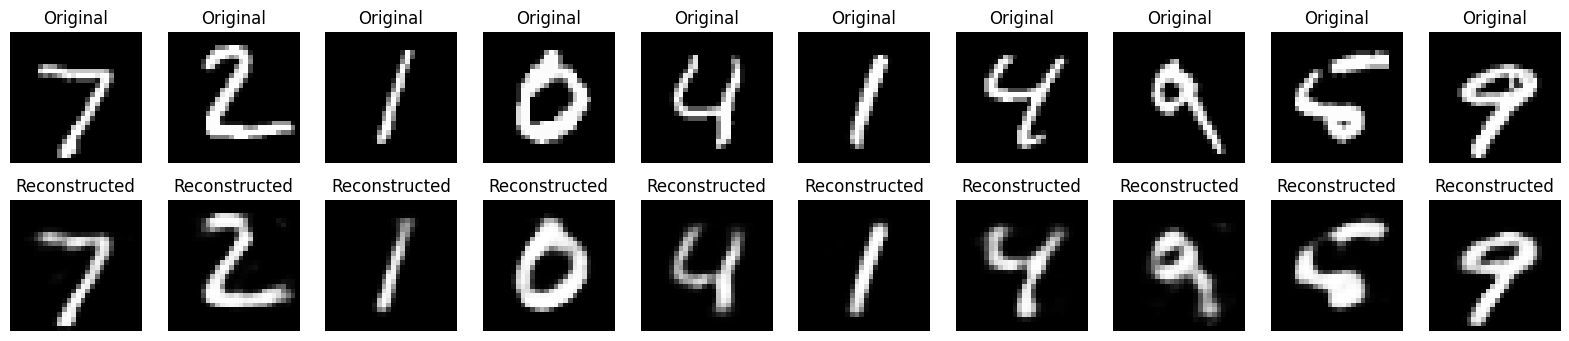

In [215]:
n = 10  # Show 10 images
plt.figure(figsize=(20,4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    plt.axis("off")

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(Y_pred[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstructed")
    plt.axis("off")

plt.show()

### **OBSERVATIONS:**

1.  Here we have performed the visualization between the Original image vs Reconstructed image.

2. We have made the comparision between the two and came to the conclusion that both the images looks the same.

3. So the Autoencoder is working fine.